In [1]:
import random
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning, message="overflow encountered in exp")


class Perceptron:
    """
    Represents a single-layer perceptron with various activation functions.
    """
    def __init__(self, bias, weights, learning_rate, activation_function):
        """
        Initializes the perceptron with given parameters.

        Args:
            bias (float): The bias value for the perceptron.
            weights (numpy.ndarray): The weight vector for the perceptron.
            learning_rate (float): The learning rate for weight updates during training.
            activation_function (callable): The activation function to use (e.g., step_function, sigmoid, relu).
        """
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.weights = weights
        self.bias = bias

    def sum(self, x):
        """
        Calculates the weighted sum of inputs plus the bias.

        Args:
            x (numpy.ndarray): The input vector.

        Returns:
            float: The weighted sum.
        """
        return np.dot(self.weights, x) + self.bias

    def cost(self, predicted, actual):
        """
        Calculates the squared error cost between the predicted and actual output.

        Args:
            predicted (float): The predicted output.
            actual (float): The actual output.

        Returns:
            float: The squared error cost.
        """
        return (predicted - actual) ** 2

    def gradient(self, predicted, actual):
        """
        Calculates the gradient of the cost function with respect to the predicted output.

        Args:
            predicted (float): The predicted output.
            actual (float): The actual output.

        Returns:
            float: The gradient of the cost function.
        """
        der = self.activation_function(predicted, derivative=True)
        if der == 0:
            return 2 * (predicted - actual)
        return 2 * (predicted - actual) * der

    def train(self, x, y):
        """
        Trains the perceptron on a single training example.

        Args:
            x (numpy.ndarray): The input vector.
            y (float): The actual output.

        Returns:
            float: The cost for the current training example.
        """
        y_pred = self.predict(x)
        gradient = self.gradient(y_pred, y)
        self.weights -= self.learning_rate * gradient * x
        self.bias -= self.learning_rate * gradient
        return self.cost(y_pred, y)

    def predict(self, x):
        """
        Predicts the output for a given input vector.

        Args:
            x (numpy.ndarray): The input vector.

        Returns:
            float: The predicted output.
        """
        return round(self.activation_function(self.sum(x)), 7)


def step_function(x, derivative=False):
    """
    The step activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the step function (or its derivative).
    """
    if derivative:
        return 0
    return 1 if x > 0 else 0


def relu(x, derivative=False):
    """
    The ReLU (Rectified Linear Unit) activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the ReLU function (or its derivative).
    """
    if derivative:
        return 1 if x > 0 else 0
    return max(0, x)


def bipolar(x, derivative=False):
    """
    The bipolar activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the bipolar function (or its derivative).
    """
    if derivative:
        return 0
    return 1 if x > 0 else -1


def sigmoid(x, derivative=False):
    """
    The sigmoid activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the sigmoid function (or its derivative).
    """
    if derivative:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))


def tanh(x, derivative=False):
    """
    The tanh (hyperbolic tangent) activation function.

    Args:
        x (float): The input value.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the tanh function (or its derivative).
    """
    if derivative:
        return 1 - np.tanh(x) ** 2
    return np.tanh(x)


def leaky_relu(x, k, derivative=False):
    """
    The Leaky ReLU activation function.

    Args:
        x (float): The input value.
        k (float): The slope for negative input values.
        derivative (bool): Whether to return the derivative.

    Returns:
        float: The output of the Leaky ReLU function (or its derivative).
    """
    if derivative:
        return 1 if x > 0 else k
    return x if x > 0 else k * x

In [2]:
def train_perceptron(perceptron, df):
    """
    Trains a perceptron model on the given DataFrame.

    Args:
        perceptron (Perceptron): The perceptron object to train.
        df (pandas.DataFrame): The DataFrame containing training data with features and target variable.

    Returns:
        tuple: A tuple containing the number of epochs trained and a list of errors at each epoch.
    """
    i = 0
    errors = []
    feature_columns = df.columns[:-1]
    target_column = df.columns[-1]

    for j in range(1000):  # Maximum number of epochs
        i += 1
        pdf = pd.DataFrame(columns=[*feature_columns, target_column, "Y"])  # DataFrame to store predictions for each epoch
        for index, row in df.iterrows():
            x = np.array([row[col] for col in feature_columns])  # Input features
            y_pred = perceptron.predict(x)  # Predict output
            pdf.loc[index] = {**{col: row[col] for col in feature_columns}, target_column: row[target_column], "Y": y_pred}  # Store prediction

        err = 0
        for index, row in df.iterrows():
            x = np.array([row[col] for col in feature_columns])  # Input features
            y = row[target_column]  # Target output
            err += perceptron.train(x, y)  # Train perceptron and accumulate error

        errors.append(err)

        # Check for convergence based on error threshold
        if hasattr(perceptron, "bias"):  # Check if perceptron has a single bias value
            if err <= 0.002:
                print("After", i, "epochs", "Weights:", perceptron.weights, "Bias:", perceptron.bias)
                break
        else:  # Perceptron might have multiple biases (e.g., in a multi-layer perceptron)
            if np.all(err <= 0.002):
                print("After", i, "epochs", "Weights:", perceptron.weights, "Bias:", perceptron.biases)
                break
    else:  # If the loop completes without breaking (not converged)
        if hasattr(perceptron, "bias"):
            print("After", i, "epochs", "Weights:", perceptron.weights, "Bias:", perceptron.bias)
        else:
            print("After", i, "epochs", "Weights:", perceptron.weights, "Bias:", perceptron.biases)

    return i, errors

After 68 epochs Weights: [0.2  0.15] Bias: -0.2999999999999812


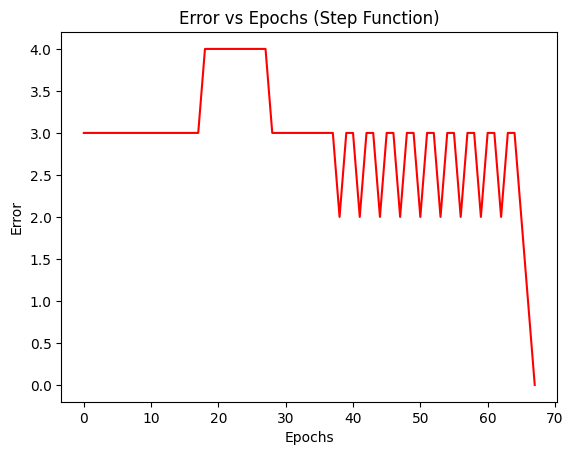

In [19]:
initial_bias = 10
initial_weights = np.array([0.2, -0.75])
learning_rate = 0.05
perceptron = Perceptron(initial_bias, initial_weights, learning_rate, step_function)

and_gate = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": [0, 1, 0, 1],
    "Z": [0, 0, 0, 1]
})

ni, errors = train_perceptron(perceptron, and_gate)

import matplotlib.pyplot as plt

plt.plot(errors, color="red")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Step Function)")
plt.show()

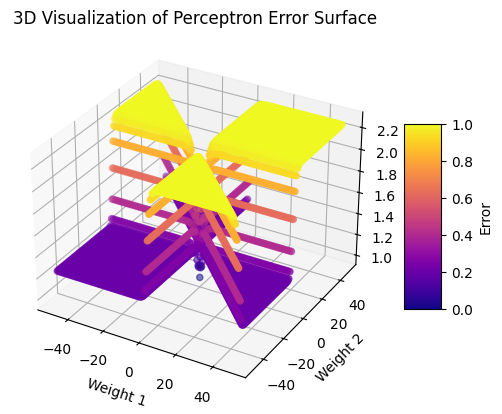

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

points = []
for x in range(-50, 51):
    for y in range(-50, 51):
        perceptron = Perceptron(0, [x, y], 0.5, sigmoid)
        err = 0
        for row in and_gate.iterrows():
            x2 = np.array([row[1][col] for col in and_gate.columns[:-1]])
            y2 = row[1]["Z"]
            py = perceptron.predict(x2)
            err += perceptron.cost(py, y2)
        points.append((x, y, err))

x = [p[0] for p in points]
y = [p[1] for p in points]
z = [p[2] for p in points]

z_norm = (z - np.min(z)) / (np.max(z) - np.min(z))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=z_norm, cmap=cm.plasma, marker='o')

cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Error')

ax.set_xlabel("Weight 1")
ax.set_ylabel("Weight 2")
ax.set_zlabel("Epochs")

ax.set_title("3D Visualization of Perceptron Error Surface")

plt.show()

In [21]:
initial_bias = 10
initial_weights = np.array([0.2, -0.75])
learning_rate = 0.05

bi_polar_perceptron = Perceptron(initial_bias, initial_weights, learning_rate, bipolar)
sigmoid_perceptron = Perceptron(initial_bias, initial_weights, learning_rate, sigmoid)
relu_perceptron = Perceptron(initial_bias, initial_weights, learning_rate, relu)

bi_polar_i, bi_polar_errors = train_perceptron(bi_polar_perceptron, and_gate)
sigmoid_i, sigmoid_errors = train_perceptron(sigmoid_perceptron, and_gate)
relu_i, relu_errors = train_perceptron(relu_perceptron, and_gate)

After 1000 epochs Weights: [0.2  0.25] Bias: -0.19999999999998133
After 1000 epochs Weights: [2.38066167 2.37596738] Bias: -3.8740856951808427
After 173 epochs Weights: [0.95654281 0.9538591 ] Bias: -0.9322390599999995


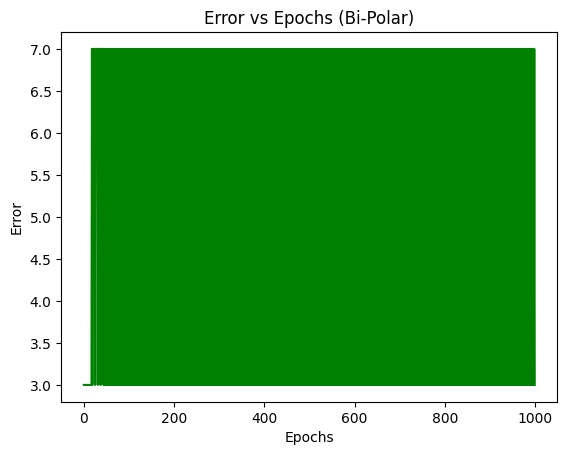

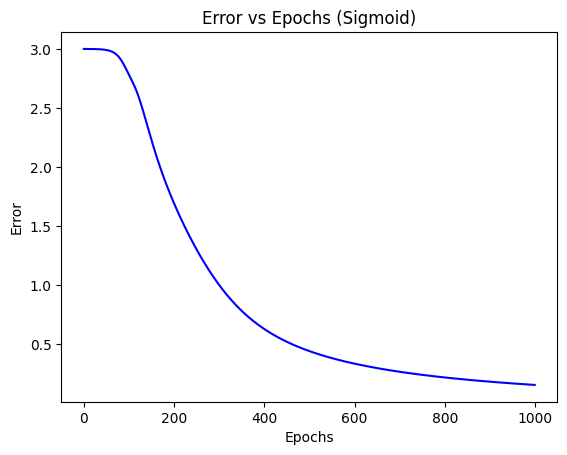

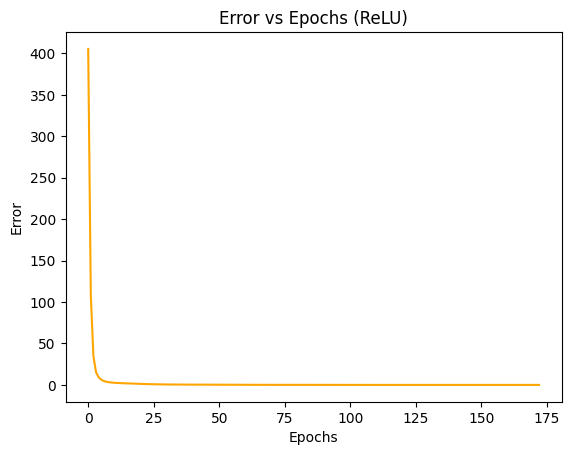

In [22]:
plt.plot(bi_polar_errors, color="green")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Bi-Polar)")
plt.show()

plt.plot(sigmoid_errors, color="blue")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Sigmoid)")
plt.show()

plt.plot(relu_errors, color="orange")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (ReLU)")
plt.show()

After 30 epochs Weights: [0.35654281 0.1538591 ] Bias: -0.39999999999999797
After 20 epochs Weights: [0.75654281 0.1538591 ] Bias: -0.8000000000000044
After 11 epochs Weights: [0.15654281 0.1538591 ] Bias: -0.19999999999999685
After 13 epochs Weights: [1.75654281 0.9538591 ] Bias: -2.0000000000000004
After 10 epochs Weights: [1.75654281 0.9538591 ] Bias: -2.0
After 10 epochs Weights: [2.95654281 0.9538591 ] Bias: -3.2
After 10 epochs Weights: [2.95654281 2.3538591 ] Bias: -4.000000000000001
After 9 epochs Weights: [2.95654281 2.3538591 ] Bias: -4.3999999999999995
After 8 epochs Weights: [2.95654281 2.3538591 ] Bias: -4.4
After 10 epochs Weights: [4.95654281 2.3538591 ] Bias: -6


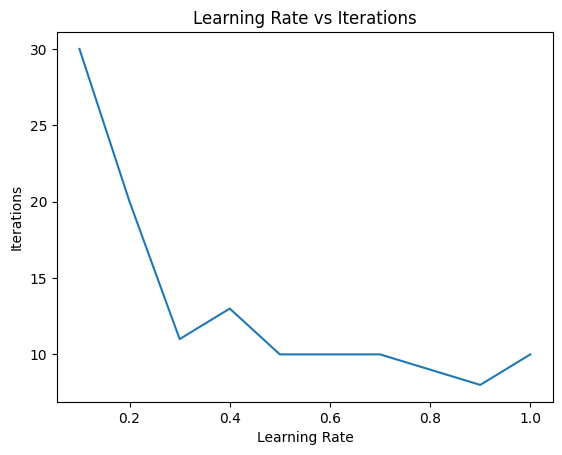

In [23]:
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations = []

for lr in learning_rates:
    perceptron = Perceptron(initial_bias, initial_weights, lr, step_function)
    i, _ = train_perceptron(perceptron, and_gate)
    iterations.append(i)
    
plt.plot(learning_rates, iterations)
plt.xlabel("Learning Rate")
plt.ylabel("Iterations")
plt.title("Learning Rate vs Iterations")
plt.show()

After 1000 epochs Weights: [-0.2  -0.15] Bias: 0.1000000000000188
After 1000 epochs Weights: [-0.2  -0.15] Bias: 0.2000000000000188
After 1000 epochs Weights: [-0.37876974 -0.36755938] Bias: 0.43497885040153644
After 1000 epochs Weights: [-0.11111112 -0.05555557] Bias: 0.5555555599999991


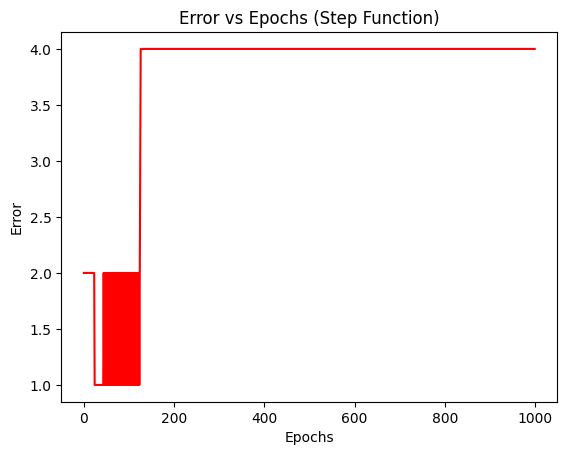

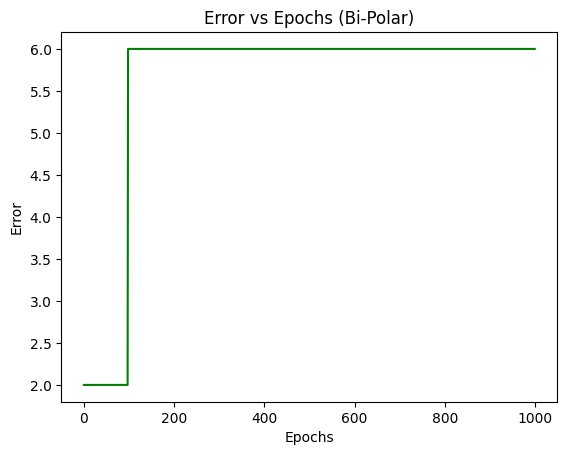

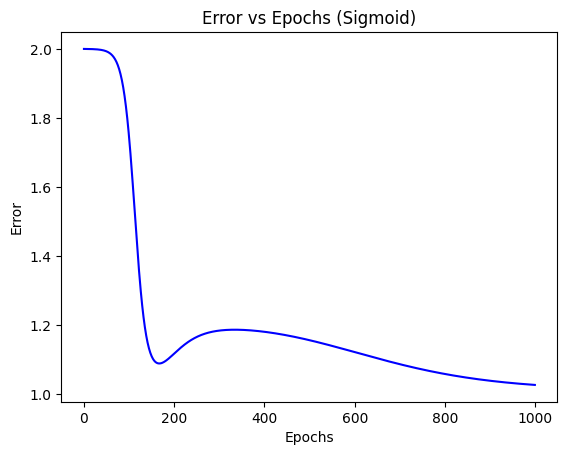

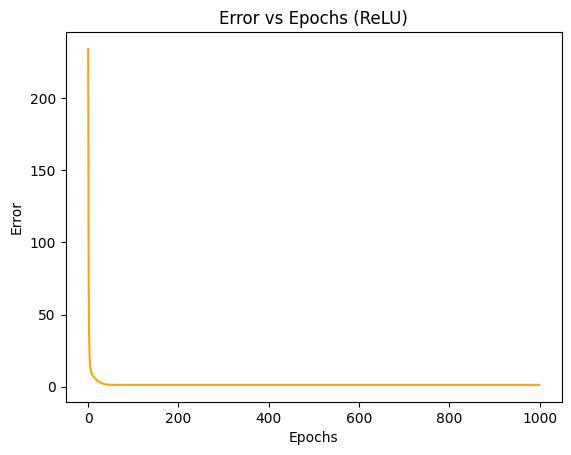

In [24]:
initial_bias = 10
initial_weights = np.array([0.2, -0.75])
learning_rate = 0.05

xor_gate = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": [0, 1, 0, 1],
    "Z": [0, 1, 1, 0]
})

step_perceptron = Perceptron(initial_bias, initial_weights, learning_rate, step_function)
bi_polar_perceptron = Perceptron(initial_bias, initial_weights, learning_rate, bipolar)
sigmoid_perceptron = Perceptron(initial_bias, initial_weights, learning_rate, sigmoid)
relu_perceptron = Perceptron(initial_bias, initial_weights, learning_rate, relu)

step_i, step_errors = train_perceptron(step_perceptron, xor_gate)
bi_polar_i, bi_polar_errors = train_perceptron(bi_polar_perceptron, xor_gate)
sigmoid_i, sigmoid_errors = train_perceptron(sigmoid_perceptron, xor_gate)
relu_i, relu_errors = train_perceptron(relu_perceptron, xor_gate)

plt.plot(step_errors, color="red")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Step Function)")
plt.show()

plt.plot(bi_polar_errors, color="green")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Bi-Polar)")
plt.show()

plt.plot(sigmoid_errors, color="blue")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Sigmoid)")
plt.show()

plt.plot(relu_errors, color="orange")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (ReLU)")
plt.show()

In [25]:
data = {
    "Candies (#)": [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    "Mangoes (Kg)": [6, 3, 6, 1, 4, 1, 4, 2, 1, 2],
    "Milk Packets (#)": [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    "Payment (Rs)": [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    "High Value Tx?": ["Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "No"]
}

df = pd.DataFrame(data, index=["C_1", "C_2", "C_3", "C_4", "C_5", "C_6", "C_7", "C_8", "C_9", "C_10"])
df["High Value Tx?"] = df["High Value Tx?"].apply(lambda x: 1 if x == "Yes" else 0)

initial_bias = 5
initial_weights = np.array([0.5, -0.5, 0.5, -0.5])
learning_rate = 0.001

perceptron = Perceptron(initial_bias, initial_weights, learning_rate, sigmoid)
i, _ = train_perceptron(perceptron, df)
print("Took Epochs:", i)

After 1000 epochs Weights: [-2.97266365  0.20427817 -1.419995    0.20417843] Bias: 4.7001865950853805
Took Epochs: 1000


In [26]:
for row in df.iterrows():
    x = np.array([row[1][col] for col in df.columns[:-1]])
    print("Predicted:", perceptron.predict(x), "Actual:", row[1]["High Value Tx?"])

Predicted: 1.0 Actual: 1
Predicted: 0.9997357 Actual: 1
Predicted: 0.9554712 Actual: 1
Predicted: 0.0 Actual: 0
Predicted: 1.02e-05 Actual: 1
Predicted: 0.0 Actual: 0
Predicted: 0.9999985 Actual: 1
Predicted: 0.9910374 Actual: 1
Predicted: 0.0 Actual: 0
Predicted: 0.0004497 Actual: 0


In [27]:
pseudo_inv = np.linalg.pinv(df[df.columns[:-1]])
weights = np.dot(pseudo_inv, df["High Value Tx?"])
print("Pseudo Inverse Weights:", weights)
print("Actual Weights", perceptron.weights)
print("Actual Bias:", perceptron.bias)

Pseudo Inverse Weights: [-0.0266824  -0.1170269  -0.07433163  0.00679927]
Actual Weights [-2.97266365  0.20427817 -1.419995    0.20417843]
Actual Bias: 4.7001865950853805


In [28]:
class NeuralNetwork:
    """
    Represents a multi-layer neural network with backpropagation.
    """
    def __init__(self, layers, learning_rate, activation_function, outputs=1):
        """
        Initializes the neural network with given parameters.

        Args:
            layers (list): A list representing the number of neurons in each layer (including input and output layers).
            learning_rate (float): The learning rate for weight and bias updates during training.
            activation_function (callable): The activation function to use for neurons (e.g., sigmoid, relu).
            outputs (int): The number of output neurons.
        """
        self.learning_rate = learning_rate
        self.activation_function = activation_function
        self.outputs = outputs

        # Initialize weights and biases randomly
        self.weights = [np.random.rand(layers[i], layers[i + 1]) - 0.5 for i in range(len(layers) - 1)]
        self.weights.append(np.random.rand(layers[-1], outputs) - 0.5)
        self.biases = [np.random.rand(layers[i + 1]) - 0.5 for i in range(len(layers) - 1)]
        self.biases.append(np.random.rand(outputs) - 0.5)

    def feedforward(self, x):
        """
        Performs the feedforward pass through the network.

        Args:
            x (numpy.ndarray): The input vector.

        Returns:
            tuple: A tuple containing the activations of each layer and the weighted sums (z-values) before activation.
        """
        activations = [x]
        z_values = []

        a = x
        for i in range(len(self.weights)):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            z_values.append(z)
            a = self.activation_function(z)
            activations.append(a)

        return activations, z_values

    def cost(self, predicted, actual):
        """
        Calculates the squared error cost between the predicted and actual output.

        Args:
            predicted (numpy.ndarray): The predicted output.
            actual (numpy.ndarray): The actual output.

        Returns:
            float: The squared error cost.
        """
        return (predicted - actual) ** 2

    def cost_derivative(self, predicted, actual):
        """
        Calculates the derivative of the squared error cost function.

        Args:
            predicted (numpy.ndarray): The predicted output.
            actual (numpy.ndarray): The actual output.

        Returns:
            numpy.ndarray: The derivative of the cost function.
        """
        return 2 * (predicted - actual)

    def backpropagation(self, x, y):
        """
        Performs the backpropagation algorithm to calculate gradients for weights and biases.

        Args:
            x (numpy.ndarray): The input vector.
            y (numpy.ndarray): The actual output.

        Returns:
            tuple: A tuple containing the gradients for weights and biases.
        """
        activations, z_values = self.feedforward(x)

        gradients_w = [np.zeros_like(w) for w in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]

        # Calculate delta for the output layer
        delta = self.cost_derivative(activations[-1], y) * self.activation_function(z_values[-1], derivative=True)

        gradients_w[-1] = np.outer(activations[-2], delta)
        gradients_b[-1] = delta

        # Backpropagate the error through hidden layers
        for l in range(2, len(self.weights) + 1):
            z = z_values[-l]
            delta = np.dot(delta, self.weights[-l + 1].T) * self.activation_function(z, derivative=True)
            gradients_w[-l] = np.outer(activations[-l - 1], delta)
            gradients_b[-l] = delta

        return gradients_w, gradients_b

    def update_parameters(self, gradients_w, gradients_b):
        """
        Updates the weights and biases based on the calculated gradients.

        Args:
            gradients_w (list): A list of gradients for weights.
            gradients_b (list): A list of gradients for biases.
        """
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * gradients_w[i]
            self.biases[i] -= self.learning_rate * gradients_b[i]

    def train(self, x, y):
        """
        Trains the neural network on a single training example.

        Args:
            x (numpy.ndarray): The input vector.
            y (numpy.ndarray): The actual output.

        Returns:
            float: The cost for the current training example.
        """
        gradients_w, gradients_b = self.backpropagation(x, y)
        self.update_parameters(gradients_w, gradients_b)
        return self.cost(self.feedforward(x)[0][-1], y)

    def predict(self, x):
        """
        Predicts the output for a given input vector.

        Args:
            x (numpy.ndarray): The input vector.

        Returns:
            numpy.ndarray: The predicted output.
        """
        return np.round(self.feedforward(x)[0][-1])

In [29]:
def train_multi_output_perceptron(nn, df):
    """
    Trains a neural network with multiple output neurons on the given DataFrame.

    Args:
        nn (NeuralNetwork): The neural network object to train.
        df (pandas.DataFrame): The DataFrame containing training data with features and target variable.

    Returns:
        tuple: A tuple containing the number of epochs trained and a list of errors at each epoch.
    """
    errors = []
    feature_columns = df.columns[:-1]
    target_column = df.columns[-1]

    # Convert target variable to one-hot encoded vectors if it's not already
    targets = [[1, 0] if x == 0 else [0, 1] for x in df[target_column]]

    for epoch in range(1000):  # Maximum number of epochs
        total_error = 0

        for index, row in df.iterrows():
            x = np.array([row[col] for col in feature_columns])  # Input features
            y = np.array(targets[index])  # Target output (one-hot encoded)

            error = nn.train(x, y)  # Train the neural network and get the error
            total_error += np.sum(error)  # Accumulate the total error for the epoch

        errors.append(total_error)

        # Check for convergence based on error threshold
        if total_error <= 0.002:
            print(f"Stopped after {epoch + 1} epochs")
            break

    print(f"Final Weights: {nn.weights}")
    print(f"Final Biases: {nn.biases}")

    return epoch + 1, errors

After 1000 epochs Weights: [array([[-1.49116729, -0.97132912],
       [-1.21247668, -1.19452739]]), array([[-2.50182732],
       [-1.71834224]])] Bias: [array([0.93064491, 0.37806555]), array([0.53080823])]


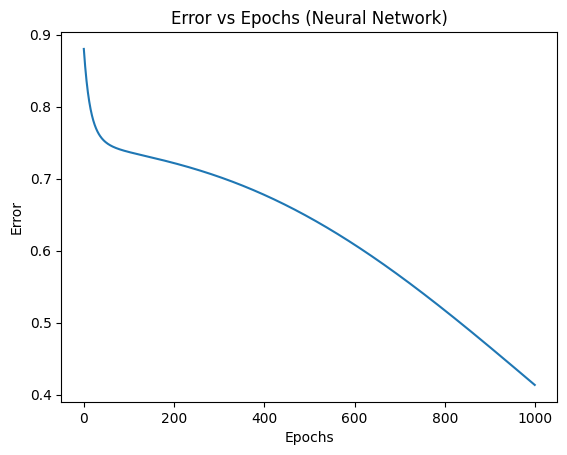

In [30]:
nn = NeuralNetwork([2,2], 0.05, sigmoid)

and_gate = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": [0, 1, 0, 1],
    "Z": [0, 0, 0, 1]
})

ni, errors = train_perceptron(nn, and_gate)

plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Neural Network)")
plt.show()

After 1000 epochs Weights: [array([[-0.28232019,  0.20423821],
       [ 0.07066318, -0.25946143]]), array([[-0.03012514],
       [ 0.28244806]])] Bias: [array([-0.33118025, -0.32572036]), array([-0.10477817])]


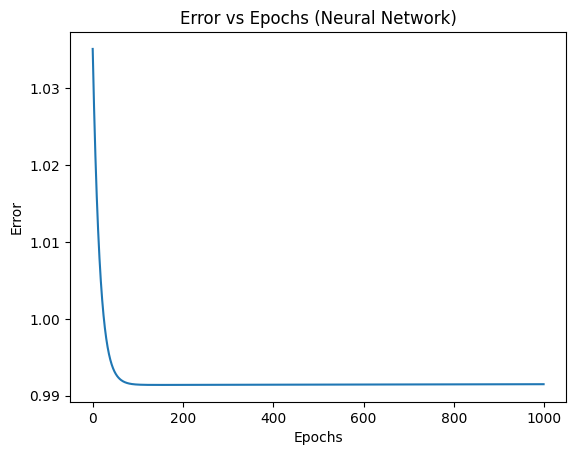

In [31]:
nn = NeuralNetwork([2,2], 0.05, sigmoid)

xor_gate = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": [0, 1, 0, 1],
    "Z": [0, 1, 1, 0]
})

ni, errors = train_perceptron(nn, xor_gate)

plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Neural Network)")
plt.show()

Final Weights: [array([[ 1.6720921 , -2.09706822],
       [ 1.52322305, -2.134029  ]]), array([[-2.41396332,  2.33424941],
       [ 3.35346805, -3.08109606]])]
Final Biases: [array([-1.6958738 ,  2.64698606]), array([ 0.51666391, -0.58279196])]


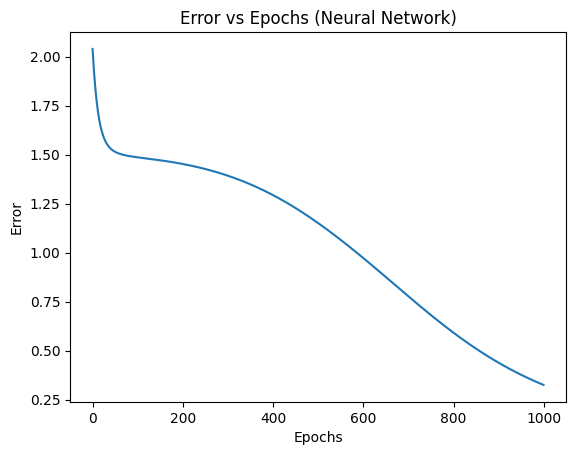

In [32]:
nn = NeuralNetwork([2,2], 0.05, sigmoid, 2)

and_gate = pd.DataFrame({
    "A": [0, 0, 1, 1],
    "B": [0, 1, 0, 1],
    "Z": [0, 0, 0, 1]
})

nn.predict([0, 0])
ni, errors = train_multi_output_perceptron(nn, and_gate)

plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs Epochs (Neural Network)")
plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(learning_rate_init=0.05, hidden_layer_sizes=(1,), max_iter=1000, activation="logistic")

X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]

classifier.fit(X, y)

print("=====================================")
print("AND Gate")
print("=====================================")

print("Final Weights:", classifier.coefs_)
print("Final Biases:", classifier.intercepts_)
print("Epochs:", classifier.n_iter_)

for i in range(len(X)):
    print(f"Predicted: {classifier.predict([X[i]])[0]}, Actual: {y[i]}")
    
print()
print("=====================================")
print("XOR Gate")
print("=====================================")
    
y2 = [0, 1, 1, 0]

classifier2 = MLPClassifier(learning_rate_init=0.05, hidden_layer_sizes=(1,), max_iter=1000, activation="logistic")
classifier2.fit(X, y2)

print("Final Weights:", classifier2.coefs_)
print("Final Biases:", classifier2.intercepts_)
print("Epochs:", classifier2.n_iter_)

for i in range(len(X)):
    print(f"Predicted: {classifier2.predict([X[i]])[0]}, Actual: {y2[i]}")

AND Gate
Final Weights: [array([[-6.11856543],
       [-6.11863384]]), array([[-8.56328631]])]
Final Biases: [array([8.43914253]), array([3.20444357])]
Epochs: 336
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1

XOR Gate
Final Weights: [array([[-0.19746153],
       [-0.28057158]]), array([[0.25787651]])]
Final Biases: [array([0.28567119]), array([-0.22223611])]
Epochs: 18
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
